# Titanic Survival Prediction

In [1]:
#Importing Required Libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
warnings.filterwarnings('ignore')

# Importing the dataset

In [2]:
Traindata = pd.read_csv("train.csv")
Testdata = pd.read_csv("test.csv")

Traindata.shape


(891, 12)

In [3]:
Traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#Checking for NULL values
Traindata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

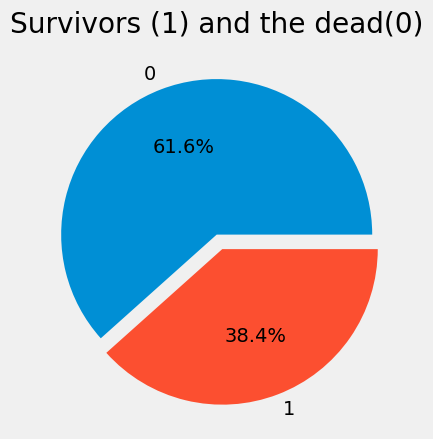

In [25]:
#Visualizing the data
p1 = Traindata['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')
p1.set_title('Survivors (1) and the dead(0)')
p1.set_ylabel('')
plt.show()

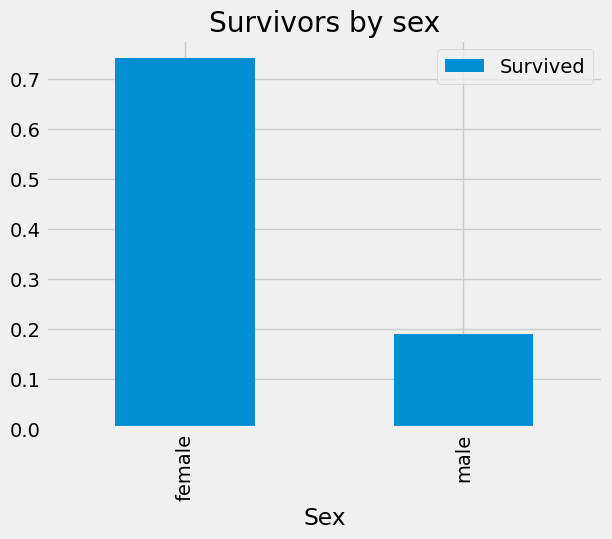

In [29]:
#Visualizing survivors based on gender

p2 = Traindata[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar()
p2.set_title('Survivors by sex')

plt.show()


# Modifying the data

In [30]:
#updating the Cabin details of passengers
Traindata["CabinBool"] = (Traindata["Cabin"].notnull().astype('int'))
Testdata["CabinBool"] = (Testdata["Cabin"].notnull().astype('int'))

Traindata = Traindata.drop(['Cabin'], axis=1)
Testdata = Testdata.drop(['Cabin'], axis=1)

In [31]:
#dropping the Ticket feature since it is not required
Traindata = Traindata.drop(['Ticket'],axis=1)
Testdata = Testdata.drop(['Ticket'],axis=1)

In [33]:
#Replacing missing values in 'Embarked' feature with 'S'
Traindata = Traindata.fillna({"Embarked":"S"})

In [34]:
#Categorizing AGE groups

Traindata["Age"] = Traindata["Age"].fillna(-0.5)
Testdata["Age"] = Testdata["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager','Student', 'Young Adult', 'Adult', 'Senior']
Traindata['AgeGroup'] = pd.cut(Traindata["Age"], bins, labels=labels)
Testdata['AgeGroup'] = pd.cut(Testdata["Age"], bins, labels=labels)


In [35]:
# create a combined group of both datasets
combine = [Traindata, Testdata]

# extract a title for each Name in the
# train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(Traindata['Title'], Traindata['Sex'])

# replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major','Rev', 'Jonkheer', 'Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

Traindata[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

# map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3,"Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)


In [37]:
#Missing Age values
mr_age = Traindata[Traindata["Title"] == 1]["AgeGroup"].mode() # Young Adult
miss_age = Traindata[Traindata["Title"] == 2]["AgeGroup"].mode() # Student
mrs_age = Traindata[Traindata["Title"] == 3]["AgeGroup"].mode() # Adult
master_age = Traindata[Traindata["Title"] == 4]["AgeGroup"].mode() # Baby
royal_age = Traindata[Traindata["Title"] == 5]["AgeGroup"].mode() # Adult
rare_age = Traindata[Traindata["Title"] == 6]["AgeGroup"].mode() # Adult

age_title_mapping = {1: "Young Adult", 2: "Student",3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(Traindata["AgeGroup"])):
    if Traindata["AgeGroup"][x] == "Unknown":
        Traindata["AgeGroup"][x] = age_title_mapping[Traindata["Title"][x]]

for x in range(len(Testdata["AgeGroup"])):
    if Testdata["AgeGroup"][x] == "Unknown":
        Testdata["AgeGroup"][x] = age_title_mapping[Testdata["Title"][x]]

In [39]:
# map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3,'Student': 4, 'Young Adult': 5, 'Adult': 6,'Senior': 7}
Traindata['AgeGroup'] = Traindata['AgeGroup'].map(age_mapping)
Testdata['AgeGroup'] = Testdata['AgeGroup'].map(age_mapping)

Traindata.head()

# dropping the Age feature for now, might change
Traindata = Traindata.drop(['Age'], axis=1)
Testdata= Testdata.drop(['Age'], axis=1)

In [40]:
Traindata = Traindata.drop(['Name'], axis=1)
Testdata = Testdata.drop(['Name'], axis=1)

In [41]:
#Assigning numerical values to Sex and Embark categories
sex_mapping = {"male": 0, "female": 1}
Traindata['Sex'] = Traindata['Sex'].map(sex_mapping)
Testdata['Sex'] = Testdata['Sex'].map(sex_mapping)

embarked_mapping = {"S": 1, "C": 2, "Q": 3}
Traindata['Embarked'] = Traindata['Embarked'].map(embarked_mapping)
Testdata['Embarked'] = Testdata['Embarked'].map(embarked_mapping)

In [42]:
#Filling the fare missing values
for x in range(len(Testdata["Fare"])):
    if pd.isnull(Testdata["Fare"][x]):
        pclass = Testdata["Pclass"][x] # Pclass = 3
        Testdata["Fare"][x] = round(Traindata[Traindata["Pclass"] == pclass]["Fare"].mean(), 4)

# map Fare values into groups of
# numerical values
Traindata['FareBand'] = pd.qcut(Traindata['Fare'], 4,labels=[1, 2, 3, 4])
Testdata['FareBand'] = pd.qcut(Testdata['Fare'], 4,labels=[1, 2, 3, 4])

# drop Fare values
Traindata = Traindata.drop(['Fare'], axis=1)
Testdata = Testdata.drop(['Fare'], axis=1)

# Training the model

In [43]:
from sklearn.model_selection import train_test_split

# Drop the Survived and PassengerId
# column from the trainset
predictors = Traindata.drop(['Survived', 'PassengerId'], axis=1)
target = Traindata["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size=0.2, random_state=0)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

randomforest = RandomForestClassifier()

# Fit the training data along with its output
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)

# Find the accuracy score of the model
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Accuaracy of the model:",acc_randomforest,"%")


Accuaracy of the model: 84.36 %


# Prediction

In [48]:
ids = Testdata['PassengerId']
predictions = randomforest.predict(Testdata.drop('PassengerId', axis=1))

output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions})

print(output)
# 1 denotes Survived, 0 denoted Not Survived

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]
